# Analysing savouries sold based on multiple factors
by Smahi

## Scope
- Filter out total savouries from the dataset.
- Find out which savoury was sold the most.
- Which day most savouries was sold.
- Which week most savouries were sold, which particular savouries was sold the most that week.
- Find the day of the week with the highest total sold for each savory.

## Summary
- There were **59** units of savouries sold on **2 & 30 Sep 2023**.
- **243** savouries were sold in **WEEK 39**, which is the highest among all weeks in September.
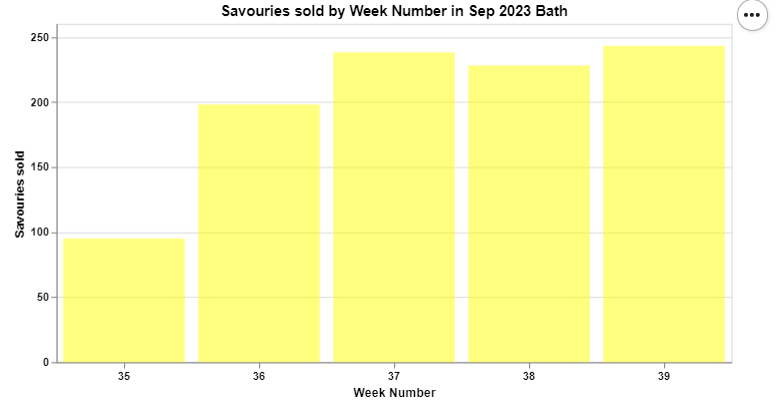
- The most sold savoury is **Brazillian cheese bread**, with 18 units sold on **2 Sep**.
- As week 39 has highest sales, the most popular savory for that week was **Coxinha**.
- **Saturday** is the highest sales for savouries followed by Friday.
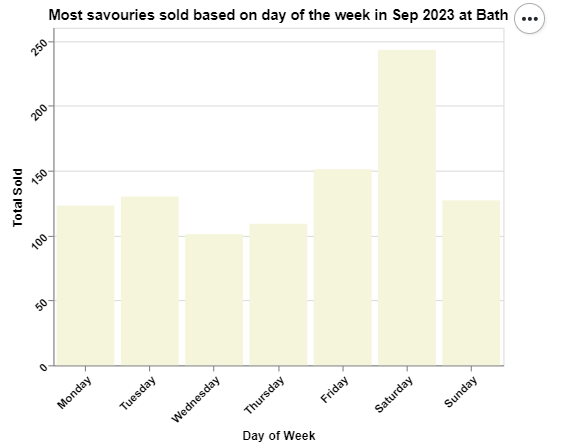
- Top 3 most sold savouries are **Brazillian cheese bread, coxinha and vegetarian brioche** respectively
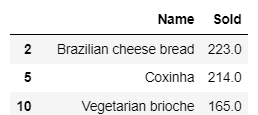
- This is the distribution of different types of savories sold in Sep 2023
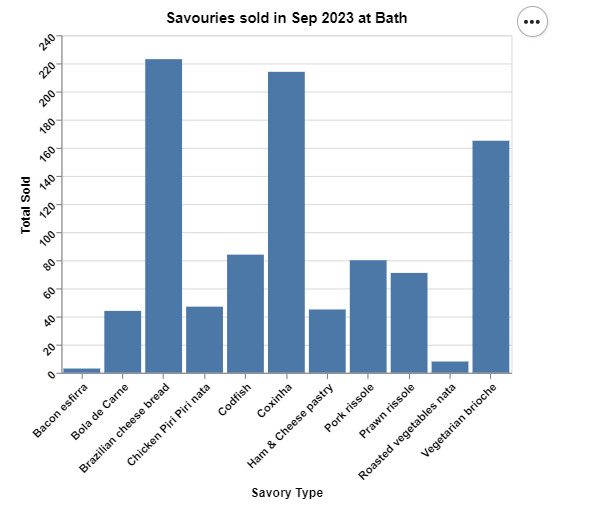
- Popular days for each savoury to be sold
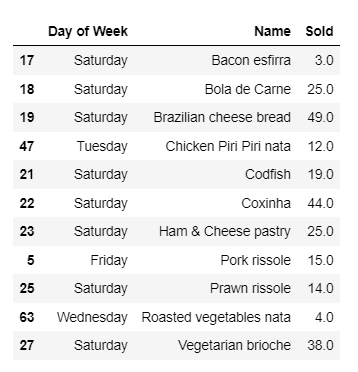
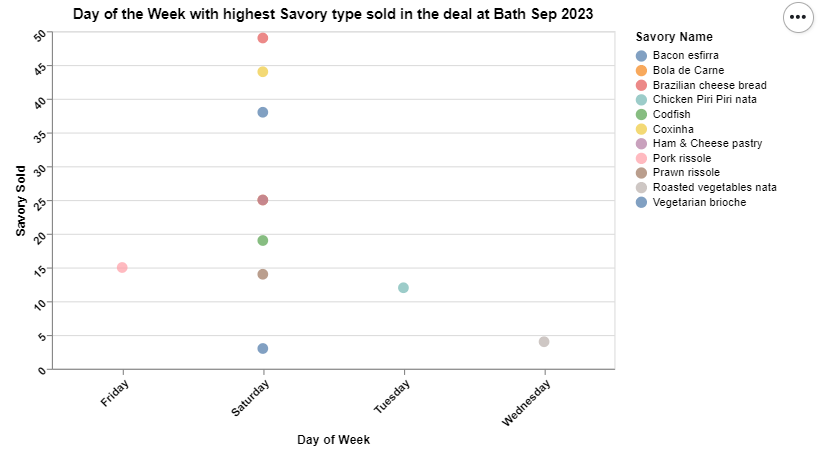

## Imports

In [1]:
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt

In [2]:
# Read the data
df = pd.read_excel('output.xlsx')

In [3]:
# Replace null values
df.fillna('',inplace=True)

In [4]:
# Preview
df.head()

,Date,Category Name,Name,Gross Sales,Net Sales,Sold,Refunded,Modifier Name,Modifier Sold,Modifier Amount,Discounts,Refunds,% Net Sales,Avg Item Size,COGS,Gross Profit,Repayments,Day of Week,Week Number
0,2023-09-01,Pasteis de nata,,,,,,,,,,,,,,,,Friday,35
1,2023-09-01,,Pastel de Nata,582.2,457.28,284.0,0.0,,,,-124.92,0.0,40.4,1.61,136.32,320.96,,Friday,35
2,2023-09-01,Total (Pasteis de nata),,582.2,457.28,284.0,0.0,-,,0.0,-124.92,0.0,40.4,1.61,136.32,320.96,,Friday,35
3,2023-09-01,Coffee Deal,,,,,,,,,,,,,,,,Friday,35
4,2023-09-01,,Coffee & Pastel de Nata,196.8,196.8,48.0,0.0,,,,0.0,0.0,17.39,4.1,0.0,196.8,,Friday,35


In [5]:
# Filter out the savouries category
savor = df[df['Category Name']=='Total (Savouries)']

In [6]:
# Preview
savor.head()

,Date,Category Name,Name,Gross Sales,Net Sales,Sold,Refunded,Modifier Name,Modifier Sold,Modifier Amount,Discounts,Refunds,% Net Sales,Avg Item Size,COGS,Gross Profit,Repayments,Day of Week,Week Number
27,2023-09-01,Total (Savouries),,114.25,111.33,36.0,0.0,-,,0.0,-2.92,0.0,9.84,3.09,30.38,80.95,,Friday,35
135,2023-09-02,Total (Savouries),,194.35,182.74,59.0,0.0,-,,0.0,-11.61,0.0,12.11,3.1,47.96,134.8,,Saturday,35
227,2023-09-03,Total (Savouries),,138.8,124.05,40.0,0.0,-,,0.0,-14.75,0.0,12.56,3.1,37.45,86.59,,Sunday,36
339,2023-09-04,Total (Savouries),,55.6,42.32,18.0,0.0,-,,0.0,-13.28,0.0,7.15,2.35,14.0,28.32,,Monday,36
387,2023-09-05,Total (Savouries),,112.4,93.06,39.0,0.0,-,,0.0,-19.34,0.0,14.23,2.39,26.86,66.19,0.0,Tuesday,36


In [7]:
# Check size
savor.shape

(30, 19)

## Which day most savouries were sold

In [8]:
# Find the maximum "Sold" value
max_sold_value = savor['Sold'].max()

# Filter the DataFrame to get the row(s) with the maximum "Modifier Sold" value
rows_with_max_sold = savor[savor['Sold'] == max_sold_value]

In [9]:
rows_with_max_sold

,Date,Category Name,Name,Gross Sales,Net Sales,Sold,Refunded,Modifier Name,Modifier Sold,Modifier Amount,Discounts,Refunds,% Net Sales,Avg Item Size,COGS,Gross Profit,Repayments,Day of Week,Week Number
135,2023-09-02,Total (Savouries),,194.35,182.74,59.0,0.0,-,,0.0,-11.61,0.0,12.11,3.1,47.96,134.8,,Saturday,35
2464,2023-09-30,Total (Savouries),,205.25,198.97,59.0,0.0,-,,0.0,-6.28,0.0,9.72,3.37,42.64,156.34,,Saturday,39


## Which week most savories were sold

In [10]:
# Get the sales for week
savor_week = savor.groupby(['Week Number','Category Name'])['Sold'].sum().reset_index()

In [11]:
savor_week

,Week Number,Category Name,Sold
0,35,Total (Savouries),95.0
1,36,Total (Savouries),198.0
2,37,Total (Savouries),238.0
3,38,Total (Savouries),228.0
4,39,Total (Savouries),243.0


In [12]:
# Visualise the above table
savor_week_chart = alt.Chart(savor_week).mark_bar(color='yellow',opacity=0.5).encode(
    x=alt.X('Week Number:N', axis=alt.Axis(labelFontWeight='bold',labelAngle=0)),
    y=alt.Y('Sold:Q', title = 'Savouries sold',axis = alt.Axis(labelFontWeight='bold')),
    tooltip=['Week Number:N', 'Sold:Q']
).properties(
    width=600,
    title='Savouries sold by Week Number in Sep 2023 Bath'
)

In [13]:
savor_week_chart

alt.Chart(...)

In [14]:
# List all the savouries names
values_to_filter = ['Vegetarian brioche',
'Coxinha',
'Brazilian cheese bread',
'Pork rissole',
'Prawn rissole',
'Ham & Cheese pastry',
'Codfish',
'Bola de Carne',
'Bacon esfirra',
'Roasted vegetables nata',
'Chicken Piri Piri nata']


In [15]:
# Filter out the savouries from the dataset
savor_df = df[df['Name'].isin(values_to_filter)]

In [16]:
# Check size
savor_df.shape

(217, 19)

In [17]:
# Preview
savor_df.head()

,Date,Category Name,Name,Gross Sales,Net Sales,Sold,Refunded,Modifier Name,Modifier Sold,Modifier Amount,Discounts,Refunds,% Net Sales,Avg Item Size,COGS,Gross Profit,Repayments,Day of Week,Week Number
20,2023-09-01,,Vegetarian brioche,35.1,33.93,9.0,0.0,,,,-1.17,0.0,3.0,3.77,9.9,24.03,,Friday,35
21,2023-09-01,,Coxinha,26.0,26.0,8.0,0.0,,,,0.0,0.0,2.3,3.25,5.44,20.56,,Friday,35
22,2023-09-01,,Brazilian cheese bread,19.35,18.26,9.0,0.0,,,,-1.09,0.0,1.61,2.03,3.78,14.48,,Friday,35
23,2023-09-01,,Pork rissole,9.75,9.42,3.0,0.0,,,,-0.33,0.0,0.83,3.14,3.84,5.58,,Friday,35
24,2023-09-01,,Prawn rissole,9.75,9.42,3.0,0.0,,,,-0.33,0.0,0.83,3.14,3.54,5.88,,Friday,35


In [18]:
# Most sold savoru by unit
savor_df.sort_values(by='Sold',ascending=False).iloc[0]

Date                  2023-09-02 00:00:00
Category Name                            
Name               Brazilian cheese bread
Gross Sales                          38.7
Net Sales                           35.23
Sold                                 18.0
Refunded                              0.0
Modifier Name                            
Modifier Sold                            
Modifier Amount                          
Discounts                           -3.47
Refunds                               0.0
% Net Sales                          2.33
Avg Item Size                        1.96
COGS                                 7.56
Gross Profit                        27.67
Repayments                               
Day of Week                      Saturday
Week Number                            35
Name: 127, dtype: object

In [19]:
# Filter the data for week 39
week_39_data = savor_df[savor_df['Week Number'] == 39]

In [20]:
week_39_data

,Date,Category Name,Name,Gross Sales,Net Sales,Sold,Refunded,Modifier Name,Modifier Sold,Modifier Amount,Discounts,Refunds,% Net Sales,Avg Item Size,COGS,Gross Profit,Repayments,Day of Week,Week Number
1997,2023-09-24,,Vegetarian brioche,23.4,19.11,6.0,0.0,,,,-4.29,0.0,1.62,3.18,6.6,12.51,,Sunday,39
1998,2023-09-24,,Coxinha,19.5,17.87,6.0,0.0,,,,-1.63,0.0,1.52,2.98,4.08,13.79,,Sunday,39
1999,2023-09-24,,Brazilian cheese bread,17.2,15.91,8.0,0.0,,,,-1.29,0.0,1.35,1.99,3.36,12.55,,Sunday,39
2000,2023-09-24,,Codfish,16.25,14.62,5.0,0.0,,,,-1.63,0.0,1.24,2.92,4.8,9.82,,Sunday,39
2001,2023-09-24,,Pork rissole,9.75,9.1,3.0,0.0,,,,-0.65,0.0,0.77,3.03,3.84,5.26,,Sunday,39
2002,2023-09-24,,Chicken Piri Piri nata,6.5,5.85,2.0,0.0,,,,-0.65,0.0,0.5,2.92,0.0,5.85,,Sunday,39
2003,2023-09-24,,Ham & Cheese pastry,3.9,3.9,1.0,0.0,,,,0.0,0.0,0.33,3.9,0.98,2.92,,Sunday,39
2005,2023-09-24,,Prawn rissole,6.5,0.0,2.0,0.0,,,,-6.5,0.0,0.0,0.0,2.36,-2.36,,Sunday,39
2071,2023-09-25,,Coxinha,32.5,31.2,10.0,0.0,,,,-1.3,0.0,3.38,3.12,6.8,24.4,,Monday,39
2072,2023-09-25,,Vegetarian brioche,27.3,26.13,7.0,0.0,,,,-1.17,0.0,2.83,3.73,7.7,18.43,,Monday,39


In [21]:
# Find the savoury with the highest sales in week 39
most_sold_savory = week_39_data.sort_values(by='Sold', ascending=False).iloc[0]

In [22]:
most_sold_savory

Date               2023-09-25 00:00:00
Category Name                         
Name                           Coxinha
Gross Sales                       32.5
Net Sales                         31.2
Sold                              10.0
Refunded                           0.0
Modifier Name                         
Modifier Sold                         
Modifier Amount                       
Discounts                         -1.3
Refunds                            0.0
% Net Sales                       3.38
Avg Item Size                     3.12
COGS                               6.8
Gross Profit                      24.4
Repayments                            
Day of Week                     Monday
Week Number                         39
Name: 2071, dtype: object

## Which day of the week most savouries are sold

In [23]:
# Categorise the sales of savouries on day of the week
savor_day = savor_df.groupby('Day of Week')['Sold'].sum().reset_index()

In [24]:
# Sort it
savor_day = savor_day.sort_values(by='Sold', ascending=False)

In [25]:
savor_day

,Day of Week,Sold
2,Saturday,243.0
0,Friday,151.0
5,Tuesday,130.0
3,Sunday,127.0
1,Monday,123.0
4,Thursday,109.0
6,Wednesday,101.0


In [26]:
# Visualise the above table sales
day_chart = alt.Chart(savor_day).mark_bar(color='beige').encode(
    x=alt.X('Day of Week:N', title='Day of Week',axis=alt.Axis(labelFontWeight='bold',labelAngle=-45),
           sort=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']),
    y=alt.Y('Sold:Q', title='Total Sold',axis=alt.Axis(labelFontWeight='bold',labelAngle=-45)),
    tooltip=['Day of Week', 'Sold']
).properties(
    width = 400,
    title='Most savouries sold based on day of the week in Sep 2023 at Bath'
)

In [27]:
day_chart

alt.Chart(...)

In [28]:
# Find the sales of individual savor type
savory_type = savor_df.groupby('Name')['Sold'].sum().reset_index()

In [29]:
# Sort it
savory_type = savory_type.sort_values(by='Sold', ascending=False)

In [30]:
savory_type

,Name,Sold
2,Brazilian cheese bread,223.0
5,Coxinha,214.0
10,Vegetarian brioche,165.0
4,Codfish,84.0
7,Pork rissole,80.0
8,Prawn rissole,71.0
3,Chicken Piri Piri nata,47.0
6,Ham & Cheese pastry,45.0
1,Bola de Carne,44.0
9,Roasted vegetables nata,8.0


In [31]:
# Visualise the ablev table
chart = alt.Chart(savory_type).mark_bar().encode(
    x=alt.X('Name:N', title='Savory Type',axis=alt.Axis(labelFontWeight='bold',labelAngle=-45)),
    y=alt.Y('Sold:Q', title='Total Sold',axis=alt.Axis(labelFontWeight='bold',labelAngle=-45)),
    tooltip=['Name', 'Sold']
).properties(
    width = 400,
    title='Savouries sold in Sep 2023 at Bath'
)

In [32]:
chart

alt.Chart(...)

## Which day of the week most savouries are sold

In [33]:
# Different savouries sold on different days of the week
grouped_data = savor_df.groupby(['Day of Week', 'Name'])['Sold'].sum().reset_index()

In [34]:
grouped_data

,Day of Week,Name,Sold
0,Friday,Brazilian cheese bread,41.0
1,Friday,Chicken Piri Piri nata,5.0
2,Friday,Codfish,11.0
3,Friday,Coxinha,34.0
4,Friday,Ham & Cheese pastry,2.0
...,...,...,...
60,Wednesday,Ham & Cheese pastry,6.0
61,Wednesday,Pork rissole,8.0
62,Wednesday,Prawn rissole,5.0
63,Wednesday,Roasted vegetables nata,4.0


In [35]:
# Find the day of the week with the highest total sold for each modifier
max_sold_by_modifier = grouped_data.groupby('Name')['Sold'].idxmax()

In [36]:
max_sold_by_modifier

Name
Bacon esfirra              17
Bola de Carne              18
Brazilian cheese bread     19
Chicken Piri Piri nata     47
Codfish                    21
Coxinha                    22
Ham & Cheese pastry        23
Pork rissole                5
Prawn rissole              25
Roasted vegetables nata    63
Vegetarian brioche         27
Name: Sold, dtype: int64

In [37]:
# Filter the grouped data to get the day of the week with the highest sales for each modifier
best_days = grouped_data.loc[max_sold_by_modifier]

In [38]:
best_days

,Day of Week,Name,Sold
17,Saturday,Bacon esfirra,3.0
18,Saturday,Bola de Carne,25.0
19,Saturday,Brazilian cheese bread,49.0
47,Tuesday,Chicken Piri Piri nata,12.0
21,Saturday,Codfish,19.0
22,Saturday,Coxinha,44.0
23,Saturday,Ham & Cheese pastry,25.0
5,Friday,Pork rissole,15.0
25,Saturday,Prawn rissole,14.0
63,Wednesday,Roasted vegetables nata,4.0


In [39]:
# Create a scatter plot using Altair
chart = alt.Chart(best_days).mark_circle(size=90).encode(
    x=alt.X('Day of Week:N', title='Day of Week',axis=alt.Axis(labelFontWeight='bold',labelAngle=-45)),
    y=alt.Y('Sold:Q', title='Savory Sold',axis=alt.Axis(labelFontWeight='bold',labelAngle=-45)),
    color=alt.Color('Name:N', title='Savory Name'),
    tooltip=['Day of Week', 'Name', 'Sold']
).properties(
    width = 500,
    title='Day of the Week with highest Savory type sold in the deal at Bath Sep 2023'
)

# Show the chart
chart

alt.Chart(...)